In [32]:
import numpy as np
import matplotlib.pyplot as plt
# from cellpose import models
from cellpose.io import imread
import glob
from pathlib import Path
from PIL import Image, ImageSequence
from tqdm import tqdm
import os
import os.path
# from livecellx import segment
from livecellx import core
from livecellx.core import datasets
from livecellx.core.datasets import LiveCellImageDataset, SingleImageDataset
from skimage import measure
from livecellx.core import SingleCellTrajectory, SingleCellStatic
# import detectron2
# from detectron2.utils.logger import setup_logger

# setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import cv2

## Load paths

In [33]:
import torch
from pathlib import Path
out_dir = Path(r"./scripts/mmdetection_classify/work_dirs/test_results/v12-st-combined-clipLen=2-trainClipNum=3")
# out_dir = Path(r"./scripts/mmdetection_classify/work_dirs/test_results/v12-st-video-clipLen=2-trainClipNum=3-epoch=18")
# out_dir = Path(r"./scripts/mmdetection_classify/work_dirs/test_results/v12-st-video-clipLen=2-trainClipNum=3-epoch=450")

# out_dir.mkdir(parents=True, exist_ok=False)

Read a trained MMAction model


In [34]:
import pandas as pd
# all_predictions_df.to_csv(out_dir/"all_predictions.csv", index=False)
# wrong_predictions_df.to_csv(out_dir/"wrong_predictions.csv", index=False)
wrong_predictions_df = pd.read_csv(out_dir/"wrong_predictions.csv")


### Visualize wrong predictions according to three frame types: combined, raw and mask

In [35]:
# Extract the last three levels of the src_dir path
wrong_predictions_df['short_src_dir'] = wrong_predictions_df['src_dir'].str.split(r'\\|/').apply(lambda x: '/'.join(x[-3:-1]))

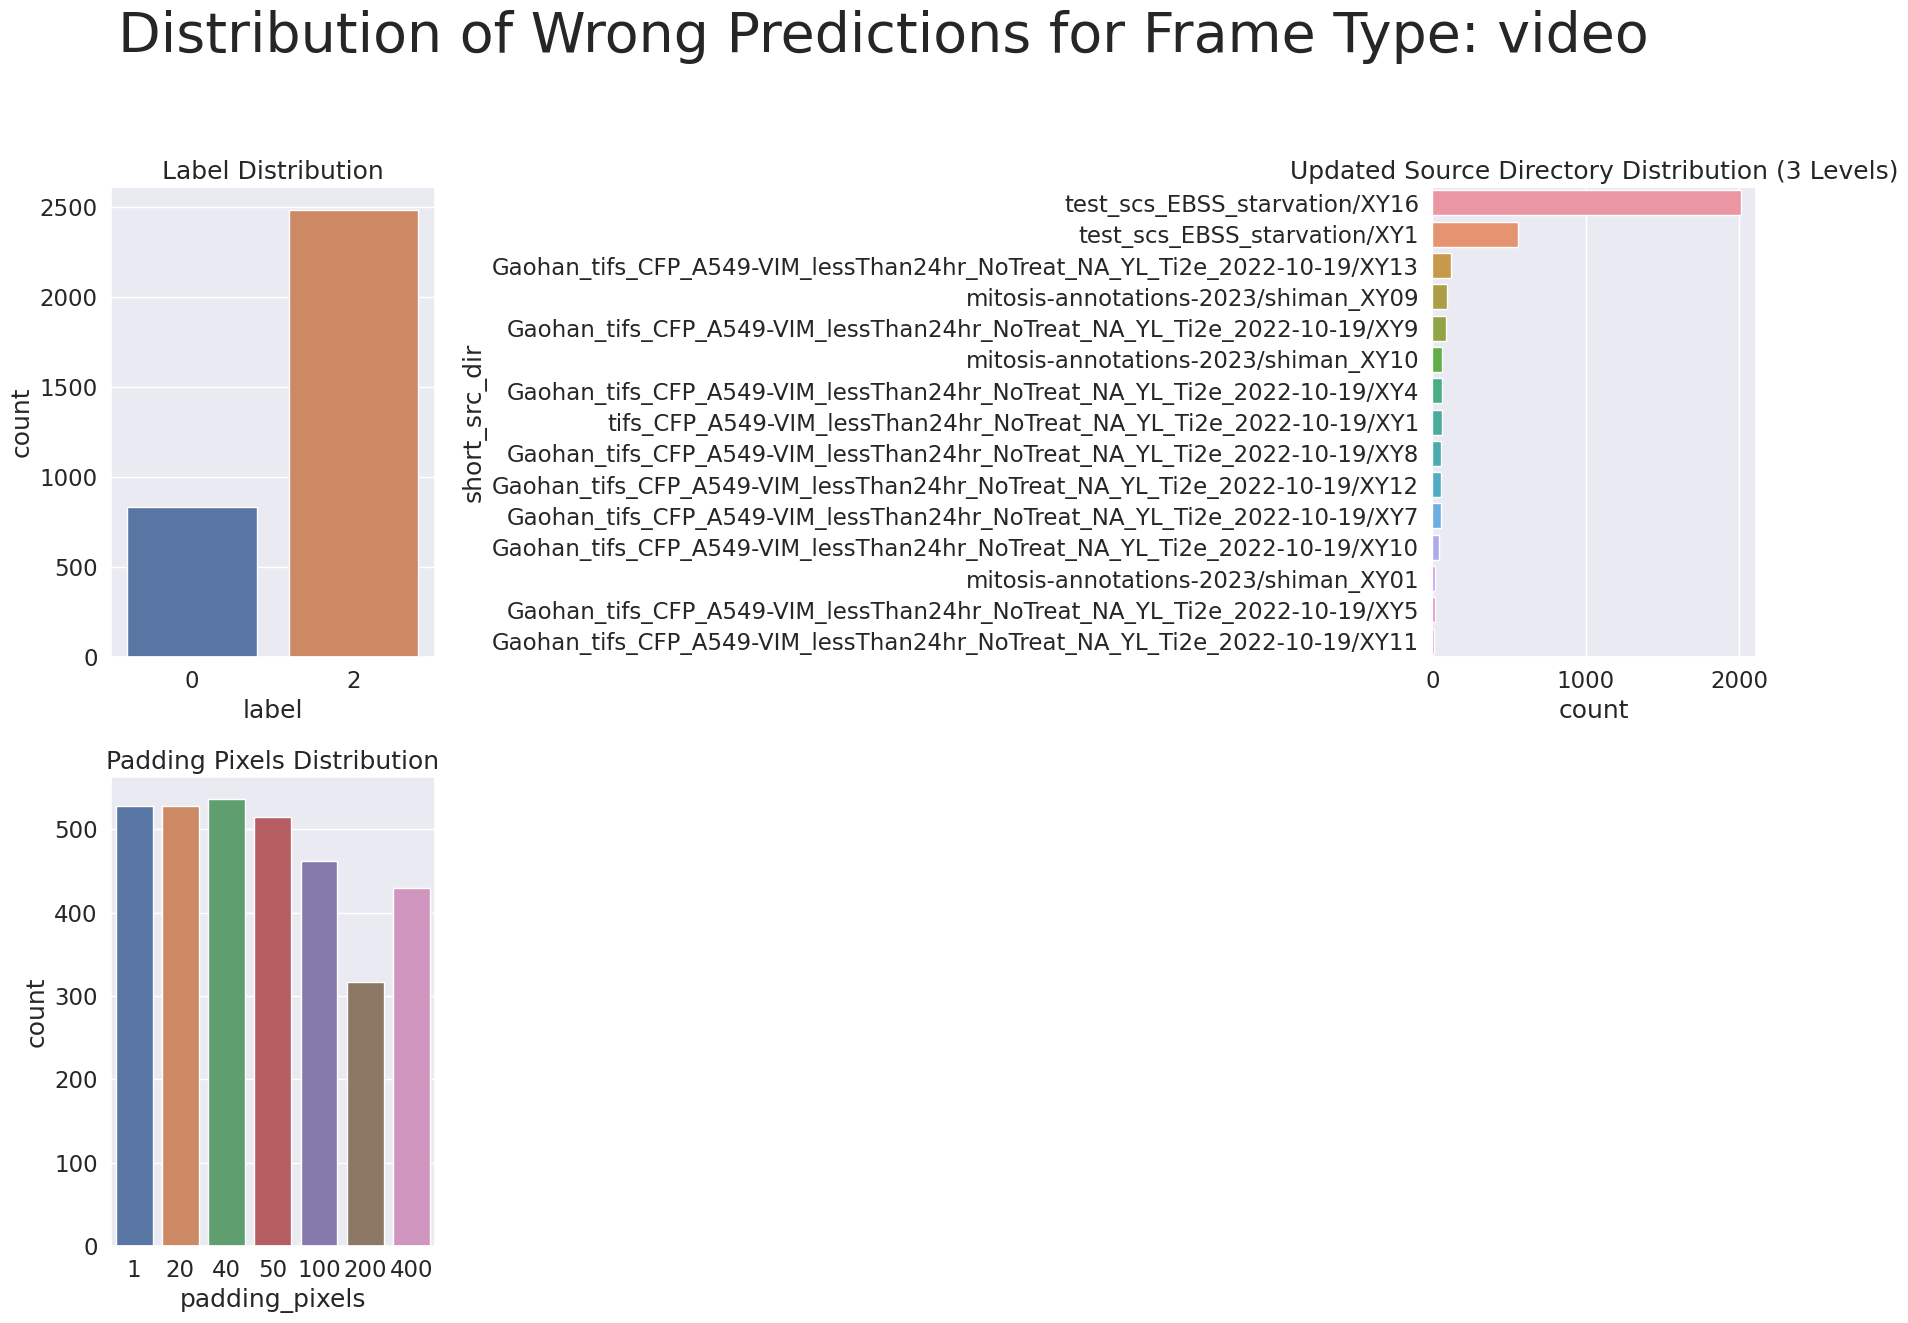

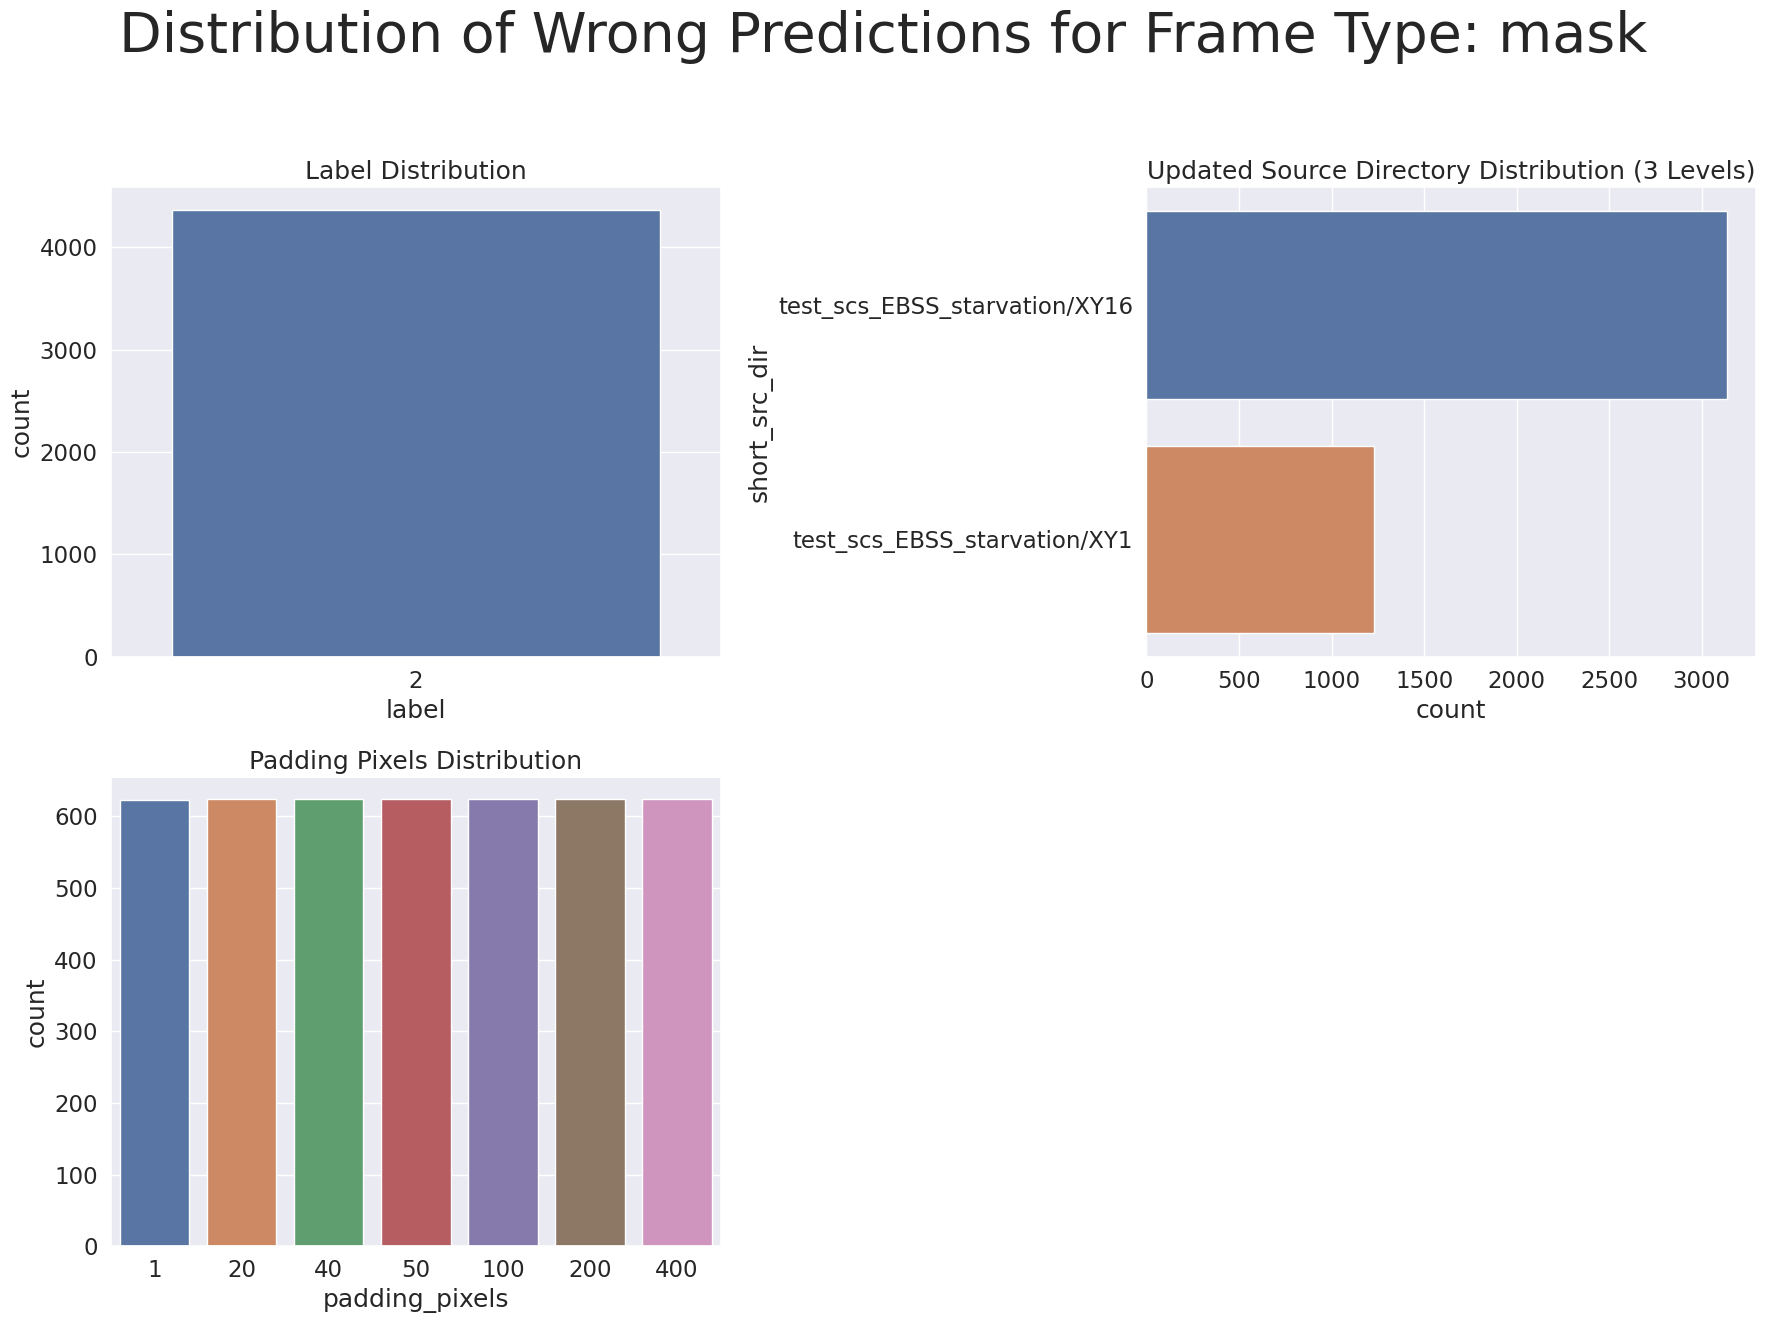

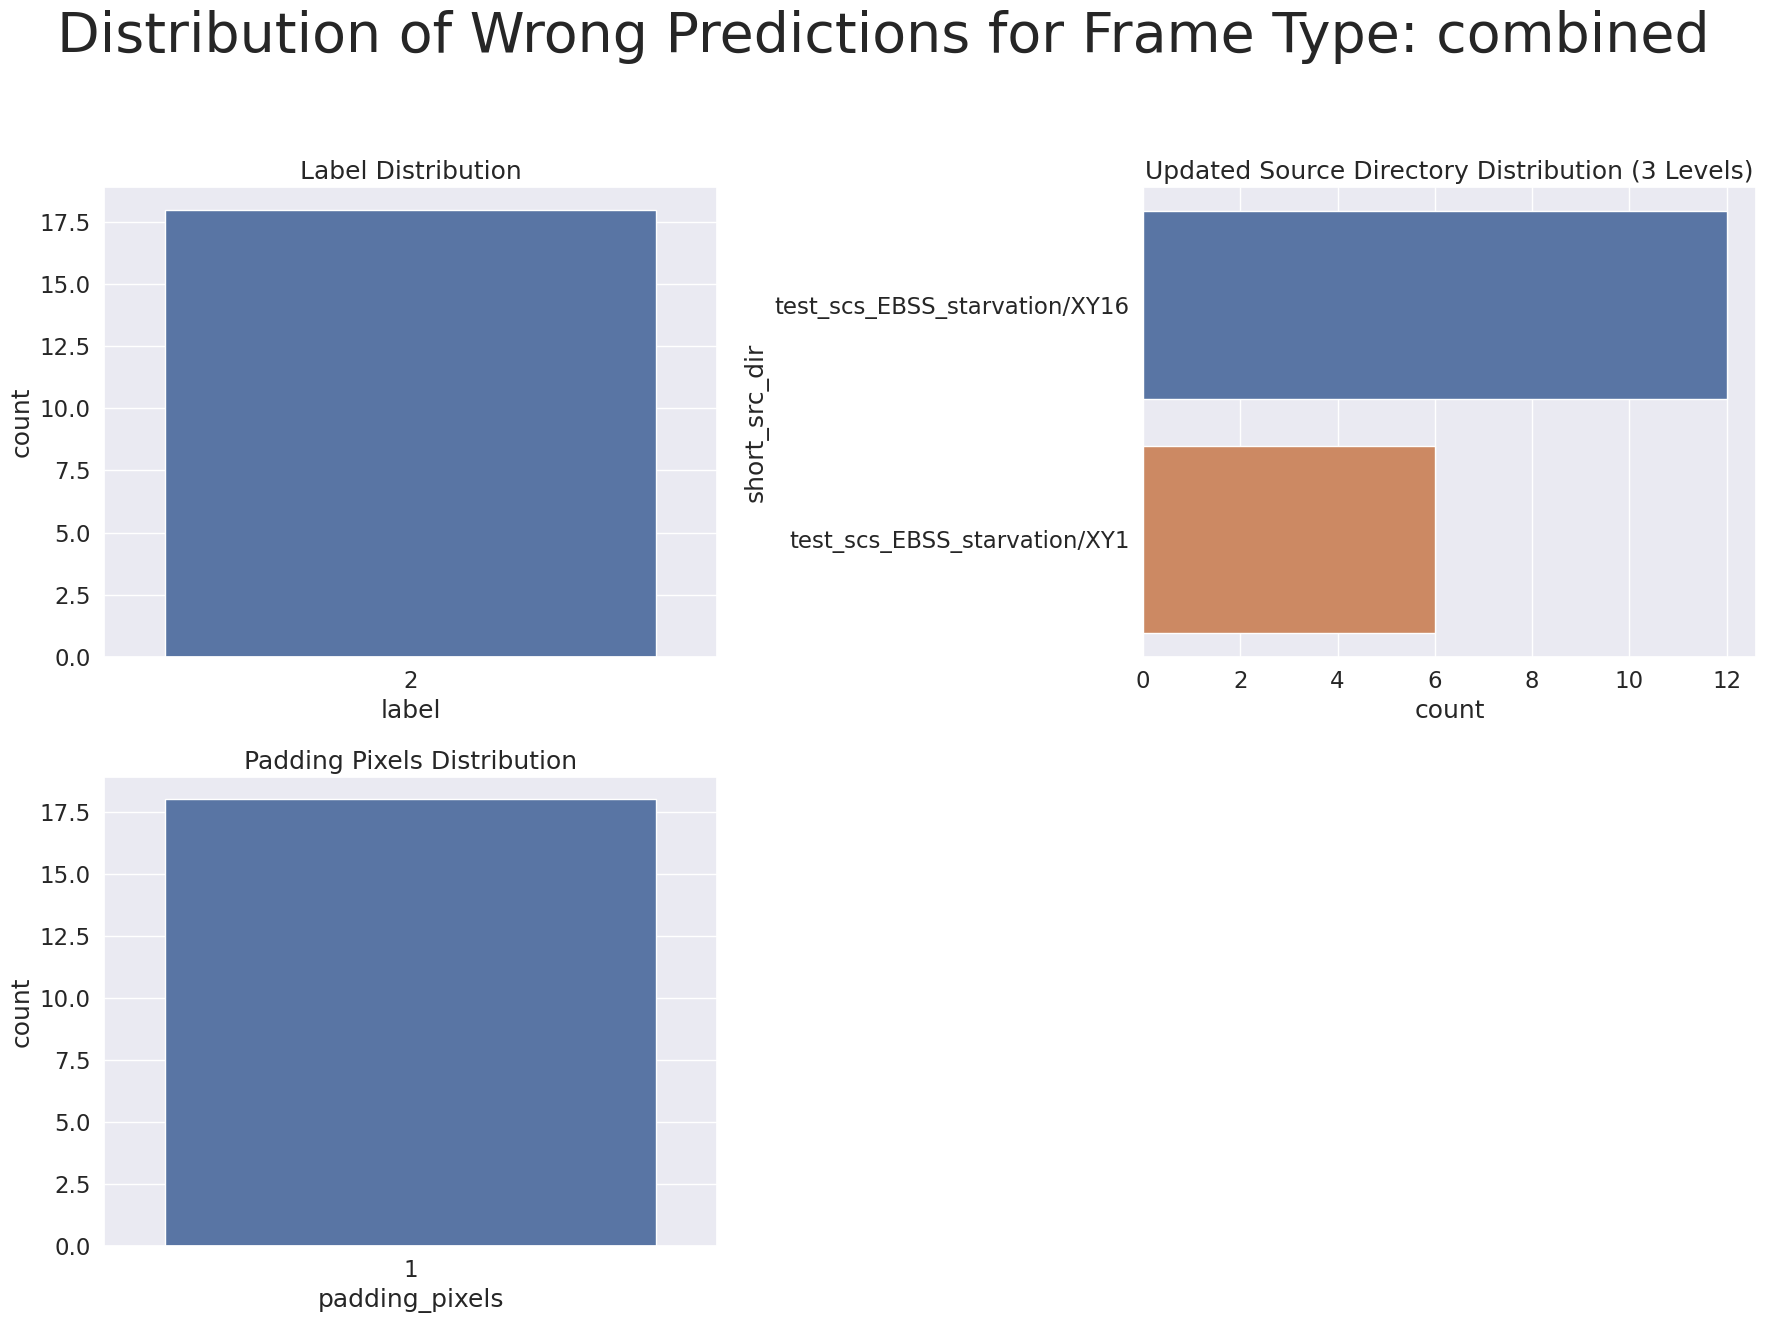

In [36]:
import seaborn as sns


# Set the font scale to 2
sns.set(font_scale=1.5)

# Unique frame types
unique_frame_types = wrong_predictions_df['frame_type'].unique()

# Create visualizations for each frame type
for frame_type in unique_frame_types:
    filtered_df = wrong_predictions_df[wrong_predictions_df['frame_type'] == frame_type]
    
    # Set up the figure and axes
    fig, axs = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle(f'Distribution of Wrong Predictions for Frame Type: {frame_type}', fontsize=40)

    # Plotting the distribution of 'label'
    sns.countplot(data=filtered_df, x='label', ax=axs[0, 0])
    axs[0, 0].set_title('Label Distribution')

    # Plotting the distribution of 'short_src_dir'
    sns.countplot(data=filtered_df, y='short_src_dir', ax=axs[0, 1], order=filtered_df['short_src_dir'].value_counts().index)
    axs[0, 1].set_title('Updated Source Directory Distribution (3 Levels)')
    axs[0, 1].tick_params(axis='y', rotation=0)

    # Plotting the distribution of 'padding_pixels'
    sns.countplot(data=filtered_df, x='padding_pixels', ax=axs[1, 0])
    axs[1, 0].set_title('Padding Pixels Distribution')

    # Placeholder for potential other visualizations for different frame types
    axs[1, 1].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()